In [12]:
# If you dont have xgboost installed, plesae install it using:
# pip install xgboost

In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# XGBoost - A Powerful Boosting Algorithm

XGBoost (Extreme Gradient Boosting) is a powerful machine learning model that provides an efficient implementation of gradient boosting for supervised learning tasks. In this notebook, we will cover:
1. What is XGBoost?
2. Why is XGBoost popular?
3. How to implement and use XGBoost in Python.
4. Applying XGBoost to a sample dataset.

## What is XGBoost?

XGBoost stands for Extreme Gradient Boosting, which is an advanced implementation of the Gradient Boosting algorithm. Its quite popular (23m downloads a month) due to its speed, performance, and scalability. It works by building an ensemble of trees, where each subsequent tree is built to correct the errors of the previous trees.

## Why is XGBoost Popular?

XGBoost has 3 main features that make it stand out from other boosting algorithms:
- **Speed**: Optimized for fast computation through parallel processing.
- **Performance**: Regularization, pruning, and handling of missing values make it robust and powerful.
- **Flexibility**: Can be used for regression, classification, and ranking problems.


## Gradient Boosting

Gradient Boosting is a machine learning technique for building predictive models for regression and classification tasks. It is based on the concept of "boosting," which combines multiple weak learners (typically decision trees) to create a strong predictive model. The key idea is to sequentially build models in such a way that each new model aims to correct the errors made by the previous models. Here's how gradient boosting works in simple terms:

### Key Concepts of Gradient Boosting

1. Weak Learners (Base Models): The individual models used in gradient boosting are often decision trees that are not very deep (shallow). These trees are called "weak learners" because they alone might not be very accurate.

2. Sequential Model Building: Gradient boosting builds the model stage by stage. It starts by fitting the first weak learner to the data. Then, each subsequent learner is trained to minimize the errors or "residuals" made by the ensemble of previous learners.

3. Gradient Descent Optimization: Gradient boosting is called "gradient" boosting because it uses gradient descent to optimize the model. In each stage, a new learner is added that minimizes a loss function (e.g., mean squared error for regression or log-loss for classification). The loss function is essentially the difference between the current predictions and the actual values, and the gradient represents the direction and magnitude of changes needed to minimize this loss.

4. Additive Model: The final model is a sum (or an additive ensemble) of all the weak learners' predictions. Each learner corrects the errors of the combined model of the previous learners.

### Workflow of Gradient Boosting

Here's a high-level overview of the steps involved in gradient boosting:

1. Initialize the Model: Start with a simple model, often predicting the mean of the target variable for regression or the log-odds for classification.

2. Calculate Residuals: Compute the residuals (errors) between the actual target values and the predictions made by the current model.

3. Fit a Weak Learner to Residuals: Fit a new weak learner (e.g., a small decision tree) to the residuals.

4. Update Model: Update the overall model by adding the new learner with a certain weight (learning rate).

5. Repeat: Repeat steps 2-4 for a predefined number of iterations or until the residuals are minimized.

6. Final Prediction: Make final predictions by summing the outputs of all the weak learners.

### Why Use Gradient Boosting?
* Handles Complex Data Relationships: It can capture complex relationships in the data through the sequential corrections made by each learner.

* Flexibility: It works well for various types of predictive modeling problems (regression, classification, ranking).

* Performance: Gradient boosting often achieves state-of-the-art results in many machine learning competitions because of its accuracy and generalizability.

### Trade-offs
While gradient boosting is powerful, it can be computationally expensive, especially with large datasets, and may overfit if not regularized properly. Techniques like regularization (L1/L2 penalties), early stopping, and learning rate tuning are used to mitigate these issues.

### Regulating XGBoost

#### L1 Regularization (Lasso Regularization)
**Concept**: L1 regularization adds a penalty to the model based on the absolute values of the weights (leaf weights in the context of trees). This tends to drive some weights to zero, effectively performing feature selection and simplifying the model.

**Purpose**: Helps to reduce overfitting by simplifying the model and encouraging sparsity in the weights.
How to activate in XGBoost: Use the parameter alpha.
A higher alpha value means a stronger penalty, resulting in more aggressive regularization.

#### L2 Regularization (Ridge Regularization)

**Concept**: L2 regularization adds a penalty based on the squared values of the weights. Unlike L1, L2 doesn't enforce sparsity, but it shrinks weights to be as small as possible.

**Purpose**: Helps to stabilize the model by preventing the weights from becoming too large and thus overfitting the data.
How to activate in XGBoost: Use the parameter reg_lambda

A higher reg_lambda value means a stronger penalty.

#### Learning Rate Tuning (Shrinkage)

**Concept**: The learning rate (often referred to as eta) controls how much the model adjusts each tree's weights in response to the error of the previous trees. A smaller learning rate makes the model learn more slowly, usually requiring more boosting rounds to converge, but it often leads to better generalization.

**Purpose**: To control overfitting by making the model learn more conservatively and slowly from the residuals.
How to activate in XGBoost:
Use the learning_rate (or eta) parameter.

#### Early Stopping
**Concept**: Early stopping allows the model to stop training before the maximum number of boosting rounds if the performance on a validation set stops improving. This prevents the model from overfitting as it will stop as soon as the model starts to learn noise rather than patterns in the data.

**Purpose:** To halt training as soon as overfitting is detected on a validation set, ensuring that the model is not overly complex.
How to activate in XGBoost:
Use early_stopping_rounds during the .fit() method. You need to provide a validation set and specify the metric to monitor.

In practice, you usually combine these techniques to achieve better generalization. Here's an example of how you might initialize an XGBClassifier with all these regularization techniques

## Important Hyperparameters


### 1. `n_estimators` (Number of Boosting Rounds)
- **What it does**: Specifies the number of boosting rounds or trees to build.
- **Tuning guidance**: A larger number of trees usually improves performance but can lead to overfitting. It should be used alongside `learning_rate` to find a good balance.

```python
n_estimators = 100  # Common values range from 100 to 1000


### 2. max_depth
**What it does:** Maximum depth of each tree, controlling the complexity of the model.

**Tuning guidance:** A deeper tree captures more complex patterns but may overfit. Typical values are between 3 and 10.


### 3. min_child_weight
**What it does:** Minimum sum of weights in a child node. Higher values make the model more conservative.

**Tuning guidance:** Controls tree depth by forcing splits to have a certain minimum weight. A larger value can prevent overfitting.


### 4. subsample
**What it does:** Fraction of training data used for each boosting round.

**Tuning guidance:** Introduces randomness to prevent overfitting. Typical values range from 0.5 to 1.0.


### 5. colsample_bytree
**What it does:** Fraction of features (columns) used for each tree.

**Tuning guidance:** Reduces overfitting by sampling columns for each tree. Typical values range from 0.5 to 1.0.


### 6. gamma
**What it does:** Minimum loss reduction required to make a split. A higher value makes the algorithm more conservative.

**Tuning guidance:** Prevents unnecessary splits in trees, which can reduce overfitting.


## Loading and Preparing the Data

For this example, we will use the Breast Cancer dataset from `sklearn`. Let's load the data and prepare it for training.


In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (455, 30)
Test set: (114, 30)


## Training the XGBoost Model

Now that our data is ready, let's train an XGBoost model. We will use `XGBClassifier` for this classification task.


In [69]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


## Evaluating the Model

To understand how well our model performs, we can use metrics like accuracy, confusion matrix, and a classification report.


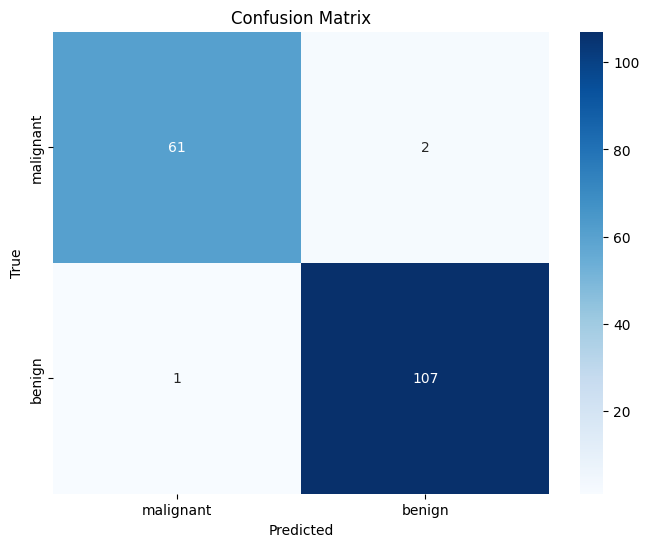

In [70]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Feature Importance

XGBoost allows us to visualize which features are most important in making predictions. Let's plot the feature importances.


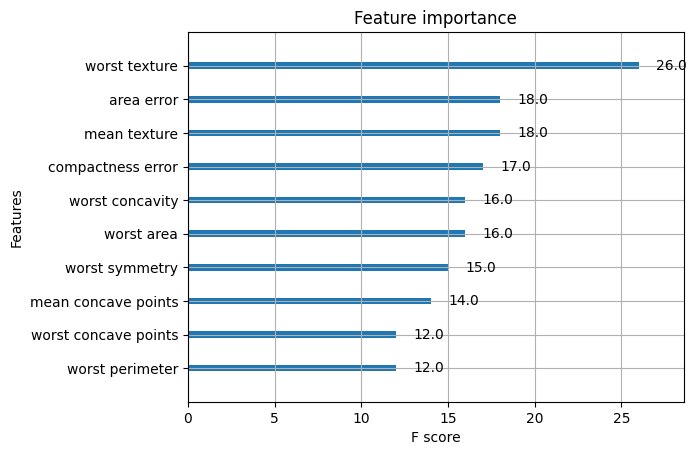

In [5]:
xgb.plot_importance(model, max_num_features=10, importance_type='weight')
plt.show()

## Conclusion

In this notebook, we explored XGBoost, a powerful and efficient gradient boosting algorithm. We loaded a dataset, trained a model, evaluated its performance, and visualized feature importance. XGBoost can be a very effective tool for a wide range of supervised learning tasks.
